In [1]:
import elf 
import siesta_utils.grid as siesta 
from siesta_utils.conversions import AtoBohr
from ase.io import read, write
import numpy as np 
# import xcml
import pickle
import re
from ase import Atoms
from elf import ElF
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
def water_local(coords):
    
    axis1 = coords[1] - coords[0]
    axis2 = coords[2] - coords[0]
    axis3 = np.cross(axis1, axis2)
    axis1 /= np.linalg.norm(axis1)
    axis2 /= np.linalg.norm(axis2)
    axis3 /= np.linalg.norm(axis3)
    return elf.geom.get_euler_angles(np.array([axis1, axis2, axis3]))

In [4]:
basis = {'r_o_o': 1.0,'r_i_o': 0.05, 'r_i_h': 0.0, 'r_o_h' : 1.5,
                      'n_rad_o' : 2,'n_rad_h' : 2, 'n_l_o' : 3,
                      'n_l_h' : 2, 'gamma_o': 0, 'gamma_h': 0}

basepath = './outputs/monomers_rotated_origin/node_'
paths = [basepath + '{}/RHO/0'.format(p) for p in range(3)]

atoms = []
coords = []
elfs = []
for p in paths:
    atoms.append(elf.siesta.get_atoms(p + '.out'))
    coords.append(atoms[-1].get_positions())
    elfs.append(elf.real_space.get_elfs(atoms[-1], elf.siesta.get_density(p + '.RHOXC'), basis))
    

# elf.geom.get_euler_angles(coords[0])

/home/sebastian/Documents/Physics/Code/ElF/elf/real_space/rs_elf.py:52: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R, where = (R != 0))


In [5]:
angles = np.genfromtxt(basepath + '0/../../monomers_rotated_origin.angles', delimiter =',')

In [6]:
for e, c, a in zip(elfs[1:], coords[1:], angles[1:]):
#     print(elf.geom.rotate_vector(c, a, True))
    rotated = elf.geom.rotate_tensor(elfs[0][0].value, -a, False)
    original = e[0].value
    print(elf.geom.make_real_old(rotated))
    print(elf.geom.make_real_old(original))
#     for key in rotated:
#         print('{} : {}'.format(rotated[key].round(4), original[key].round(4)))

[227.13558475  -7.55474976  -6.76645363 -11.14193983   2.17766749
  -3.0663369    0.54598286  -2.56721606   1.47963433 106.86358621
   5.22543379   4.68018883   7.70660456  -4.73346008   6.90957527
  -1.54101263   5.29570507  -3.40581608]
[227.13638418  -7.5542249   -6.76699663 -11.14264563   2.17798547
  -3.06585672   0.5460235   -2.56661706   1.48037588 106.86299178
   5.2261462    4.68043838   7.70758792  -4.73294991   6.92453674
  -1.5448883    5.30648213  -3.40657208]
[227.13558475   2.27587524  14.36736424  -3.9244361   -0.67456127
  -1.04755648   4.32972796  -1.20913368  -1.20901409 106.86358621
  -1.57416668  -9.93755094   2.71443551   1.05703387   2.42358026
  -9.42074377   2.87455472   2.8569442 ]
[227.13625899   2.27577613  14.36723678  -3.92447084  -0.67417574
  -1.04739187   4.32907633  -1.20931215  -1.20945241 106.86325473
  -1.57427385  -9.93807189   2.71482954   1.05583727   2.4290058
  -9.44041671   2.88099848   2.85737515]


In [7]:
p0 = elf.geom.make_real_old(elfs[0][0].value)[1:4]
for e, c, a in zip(elfs[1:], coords[1:], angles[1:]):

    rotated = elf.geom.rotate_vector(np.array([p0]), a, False)
    original = elf.geom.make_real_old(e[0].value)[1:4]
    print(rotated)
    print(original)
#     for key in rotated:
#         print('{} : {}'.format(rotated[key].round(4), original[key].round(4)))

[[ -7.55474976  -6.76645363 -11.14193983]]
[ -7.5542249   -6.76699663 -11.14264563]
[[ 2.27587524 14.36736424 -3.9244361 ]]
[ 2.27577613 14.36723678 -3.92447084]


In [8]:
p0 = elf.geom.make_real_old(elfs[0][0].value)[1:4]
for e, c, a in zip(elfs[1:], coords[1:], angles[1:]):

    coords_rot = elf.geom.rotate_vector(coords[0], a, False)

    print(coords_rot)
    print(c-c[0])

[[ 0.          0.          0.        ]
 [-0.10379396  0.29521583 -0.91020914]
 [-0.49046808 -0.82746993  0.03377615]]
[[ 0.          0.          0.        ]
 [-0.10379396  0.29521583 -0.91020914]
 [-0.49046808 -0.82746993  0.03377615]]
[[ 0.          0.          0.        ]
 [ 0.70421738  0.58888498  0.28930711]
 [-0.5251954   0.54126221 -0.59800607]]
[[ 0.          0.          0.        ]
 [ 0.70421738  0.58888498  0.28930711]
 [-0.5251954   0.54126221 -0.59800607]]


In [31]:
elfs_all = elf.utils.preprocess_all('./outputs/monomers_rotated_origin',basis, method='nn')

['/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_0/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_1/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_2/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_3/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_4/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_5/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_6/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_7/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_8/RHO/0', '/home/sebastian/Documents/Physics/Code/ElF/test/./outputs/monomers_rotated_origin/node_9/RHO/0']
10 systems found. P

/home/sebastian/Documents/Physics/Code/ElF/elf/real_space/rs_elf.py:52: RuntimeWarning: invalid value encountered in true_divide
  Theta = np.arccos(Z/R, where = (R != 0))


In [32]:
elf.utils.elfs_to_hdf5(elfs_all, 'elfs_all.hdf5')

In [33]:
elfs_all = elf.utils.hdf5_to_elfs('elfs_all.hdf5','o')



angles = np.concatenate(np.array([[e.angles for e in e] for e in elfs_all]))
elfs_all = np.concatenate(np.array([[e.value for e in e] for e in elfs_all]))

{'r_o_o': 1.0, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.5, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


In [34]:
coords = np.genfromtxt('./outputs/monomers_rotated_origin.csv', delimiter = ',').reshape(-1,3,3)

In [35]:
for c,a in zip(coords,angles):
    print(elf.geom.rotate_vector(c,a, True).round(4))

[[ 0.      0.      0.    ]
 [ 0.9625  0.      0.    ]
 [-0.2328  0.9339  0.    ]]
[[ 0.      0.      0.    ]
 [-0.2328  0.9339 -0.    ]
 [ 0.9625  0.      0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9625 -0.      0.    ]
 [-0.2328  0.9339 -0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9625  0.      0.    ]
 [-0.2328  0.9339  0.    ]]
[[ 0.      0.      0.    ]
 [-0.2328  0.9339  0.    ]
 [ 0.9625 -0.      0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9625 -0.     -0.    ]
 [-0.2328  0.9339 -0.    ]]
[[ 0.      0.      0.    ]
 [-0.2328  0.9339 -0.    ]
 [ 0.9625 -0.     -0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9625  0.     -0.    ]
 [-0.2328  0.9339 -0.    ]]
[[ 0.      0.      0.    ]
 [-0.2328  0.9339 -0.    ]
 [ 0.9625  0.      0.    ]]
[[ 0.      0.      0.    ]
 [ 0.9625  0.     -0.    ]
 [-0.2328  0.9339 -0.    ]]


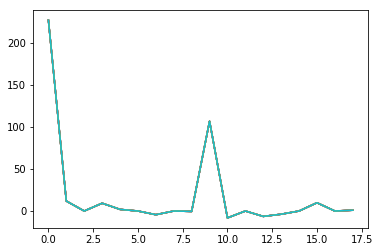

In [36]:
plot(elfs_all.T)